# Satish Agrawal
## Bellevue University
### DSC 540 -- Milestone 2

In [86]:
# Load required binaries
import numpy as np
import array as arr
import pandas as pd
import matplotlib.pyplot as plt

### Load the data from html

In [35]:
from bs4 import BeautifulSoup
fd = open("2019 US Vehicle Sales Figures By Model _ GCBC.html", "r", encoding="utf-8")
soup = BeautifulSoup(fd)
fd.close()

In [36]:
all_cars = soup.find_all("table", {"id": "table_5"})
print("Number of tables: ",len(all_cars))
all_cars

Number of tables:  1


[<table class="scroll responsive display nowrap data-t data-t wpDataTable dataTable" data-described-by="table_5_desc" data-wpdatatable_id="2328" id="table_5" role="grid" style="">
 <!-- Table header -->
 <thead>
 <tr role="row"><th aria-controls="table_5" aria-label="Model: activate to sort column ascending" aria-sort="descending" class="wdtheader sort expand column-model sorting_desc" colspan="1" data-class="expand" rowspan="1" style="" tabindex="0">Model</th><th aria-controls="table_5" aria-label="Jan: activate to sort column ascending" class="wdtheader sort numdata integer column-jan sorting" colspan="1" rowspan="1" style="" tabindex="0">Jan</th><th aria-controls="table_5" aria-label="Feb: activate to sort column ascending" class="wdtheader sort numdata integer column-feb sorting" colspan="1" rowspan="1" style="" tabindex="0">Feb</th><th aria-controls="table_5" aria-label="Mar: activate to sort column ascending" class="wdtheader sort numdata integer column-mar sorting" colspan="1" r

In [37]:
# extract header
header = [th.getText().strip() for th in all_cars[0].thead.tr.findAll('th')]
header

['Model',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [38]:
rows = all_cars[0].tbody.findAll('tr', recursive=False)
rows

[<tr class="odd" id="table_2328_row_301" role="row">
 <td class="column-model sorting_1" style=""><span class="responsiveExpander"></span>Volvo XC90</td>
 <td class="numdata integer column-jan" style="">1,427</td>
 <td class="numdata integer column-feb" style="">1,996</td>
 <td class="numdata integer column-mar" style="">3,236</td>
 <td class="numdata integer column-apr" style="">2,700</td>
 <td class="numdata integer column-may" style="">3,201</td>
 <td class="numdata integer column-jun" style="">3,475</td>
 <td class="numdata integer column-jul" style="">2,776</td>
 <td class="numdata integer column-aug" style="">3,163</td>
 <td class="numdata integer column-sep" style="">2,935</td>
 <td class="numdata integer column-oct" style="">2,720</td>
 <td class="numdata integer column-nov" style="">3,522</td>
 <td class="numdata integer column-dec" style="">4,609</td>
 </tr>,
 <tr class="even" id="table_2328_row_300" role="row">
 <td class="column-model sorting_1" style=""><span class="respon

In [39]:
data_rows = [[td.getText().strip() for i, td in enumerate(tr.findAll('td', recursive=False))] for tr in rows]

In [40]:
df = pd.DataFrame(data_rows, columns=header)
df.head()

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Volvo XC90,"1,427","1,996","3,236","2,700","3,201","3,475","2,776","3,163","2,935","2,720","3,522","4,609"
1,Volvo XC60,"1,471","2,229","2,936","2,251","2,872","2,807","2,426","2,926","2,253","2,285","2,585","3,537"
2,Volvo XC40,"1,042",985,"1,550","1,824","1,715","1,437","2,072","1,501","1,090","1,048","1,404","1,979"
3,Volvo 90-Series,514,367,346,333,206,226,212,141,"1,094",204,191,218
4,Volvo 60-Series,"1,400","1,058","1,501","1,259","1,767","1,989","1,309","1,456","1,951","2,550","1,933","2,017"


In [41]:
df.shape

(302, 13)

### Replace headers

In [42]:
# Planning to add more columns based on Model column
# lets rename Model column
df = df.rename(columns={'Model': 'Car Details'})
df.head()

,Car Details,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Volvo XC90,"1,427","1,996","3,236","2,700","3,201","3,475","2,776","3,163","2,935","2,720","3,522","4,609"
1,Volvo XC60,"1,471","2,229","2,936","2,251","2,872","2,807","2,426","2,926","2,253","2,285","2,585","3,537"
2,Volvo XC40,"1,042",985,"1,550","1,824","1,715","1,437","2,072","1,501","1,090","1,048","1,404","1,979"
3,Volvo 90-Series,514,367,346,333,206,226,212,141,"1,094",204,191,218
4,Volvo 60-Series,"1,400","1,058","1,501","1,259","1,767","1,989","1,309","1,456","1,951","2,550","1,933","2,017"


### Format data in to more readable format

In [43]:
# model here is combination of two fields
# 1. Brand
# 2. Model

# Lets split the mso that it be easier to join with other data frames
split = df["Car Details"].str.split(" ", n=1, expand = True)
df["Brand"] = split[0]
df["Model"] = split[1]
df.head()

,Car Details,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Brand,Model
0,Volvo XC90,"1,427","1,996","3,236","2,700","3,201","3,475","2,776","3,163","2,935","2,720","3,522","4,609",Volvo,XC90
1,Volvo XC60,"1,471","2,229","2,936","2,251","2,872","2,807","2,426","2,926","2,253","2,285","2,585","3,537",Volvo,XC60
2,Volvo XC40,"1,042",985,"1,550","1,824","1,715","1,437","2,072","1,501","1,090","1,048","1,404","1,979",Volvo,XC40
3,Volvo 90-Series,514,367,346,333,206,226,212,141,"1,094",204,191,218,Volvo,90-Series
4,Volvo 60-Series,"1,400","1,058","1,501","1,259","1,767","1,989","1,309","1,456","1,951","2,550","1,933","2,017",Volvo,60-Series


### Fix casing issues

In [44]:
# Fix any capitalization issues
df.Brand = df.Brand.str.capitalize()
df.Model = df.Model.str.capitalize()

### Find duplicates

In [74]:
# key here in this data set is the combination of brand and model. Car details is the combination of the two. 
#Lets find if there are any duplicates

any(df["Car Details"].duplicated())

False

In [75]:
# After split we have two columns specifying a car, Brand and Model. 
# Almost every brand has multiple Models, lets check if there are any models which appeared more than once.

any(df["Model"].duplicated())

False

In [60]:
df.replace("-", 0, inplace=True)
df.replace(",", "", regex = True, inplace=True)
df

,Car Details,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Brand,Model
0,Volvo XC90,1427,1996,3236,2700,3201,3475,2776,3163,2935,2720,3522,4609,Volvo,Xc90
1,Volvo XC60,1471,2229,2936,2251,2872,2807,2426,2926,2253,2285,2585,3537,Volvo,Xc60
2,Volvo XC40,1042,985,1550,1824,1715,1437,2072,1501,1090,1048,1404,1979,Volvo,Xc40
3,Volvo 90-Series,514,367,346,333,206,226,212,141,1094,204,191,218,Volvo,90-series
4,Volvo 60-Series,1400,1058,1501,1259,1767,1989,1309,1456,1951,2550,1933,2017,Volvo,60-series
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Acura RLX,119,127,135,151,91,50,42,38,46,68,80,72,Acura,Rlx
298,Acura RDX,4172,4965,5835,4926,5415,4868,4934,5459,4384,5888,5767,6263,Acura,Rdx
299,Acura NSX,31,22,26,23,30,19,10,25,16,15,11,10,Acura,Nsx
300,Acura MDX,2968,3833,3982,3339,4425,4087,4788,5976,3833,4368,4784,5636,Acura,Mdx


### Identify outliers and bad data

{'whiskers': [<matplotlib.lines.Line2D at 0x169aa07e908>,
 'caps': [<matplotlib.lines.Line2D at 0x169aa083a48>,
 'boxes': [<matplotlib.lines.Line2D at 0x169aa079e48>],
 'medians': [<matplotlib.lines.Line2D at 0x169aa087b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x169aa087cc8>],
 'means': []}

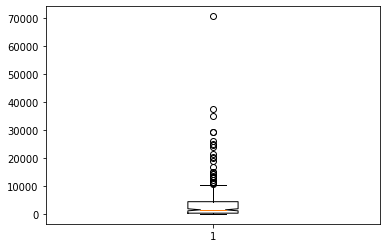

In [67]:
plt.boxplot(pd.to_numeric(df.Jan), notch=True)

In [ ]:
# Al though it looks like there is one record that is way too high from rest of other sales data, 
#it is possible that, this one brand sells a lot more cars than others.

# Lets see how it looks like for all other months

{'whiskers': [<matplotlib.lines.Line2D at 0x169a9f25e48>,
 'caps': [<matplotlib.lines.Line2D at 0x169a9f2ab48>,
 'boxes': [<matplotlib.lines.Line2D at 0x169a9f25848>,
 'medians': [<matplotlib.lines.Line2D at 0x169a9f2ad48>,
 'fliers': [<matplotlib.lines.Line2D at 0x169a9f30b88>,
 'means': []}

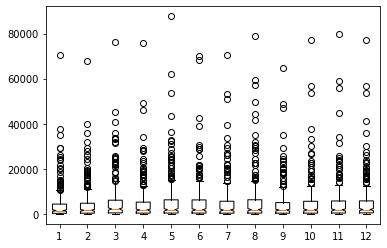

In [66]:
plt.boxplot([pd.to_numeric(df.Jan),pd.to_numeric(df.Feb),pd.to_numeric(df.Mar),pd.to_numeric(df.Apr),pd.to_numeric(df.May),pd.to_numeric(df.Jun),pd.to_numeric(df.Jul),pd.to_numeric(df.Aug),pd.to_numeric(df.Sep),pd.to_numeric(df.Oct),pd.to_numeric(df.Nov),pd.to_numeric(df.Dec)], notch=True)

In [73]:
# It looks like each month there are brands/model which sell more than other cars. Cannt be determined as outlier at this point

# lets find out if there are any negetive number of cars for any months.
print(any(pd.to_numeric(df.Jan) <0))
print(any(pd.to_numeric(df.Feb) <0))
print(any(pd.to_numeric(df.Mar) <0))
print(any(pd.to_numeric(df.Apr) <0))
print(any(pd.to_numeric(df.May) <0))
print(any(pd.to_numeric(df.Jun) <0))
print(any(pd.to_numeric(df.Jul) <0))
print(any(pd.to_numeric(df.Aug) <0))
print(any(pd.to_numeric(df.Sep) <0))
print(any(pd.to_numeric(df.Oct) <0))
print(any(pd.to_numeric(df.Nov) <0))
print(any(pd.to_numeric(df.Dec) <0))

False
False
False
False
False
False
False
False
False
False
False
False
